In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"day08_data.csv",index_col
= 0)

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**数据预处理**

**inplace=True**：这个参数表示在原 DataFrame 上进行修改。如果不指定 inplace=True，drop 方法会返回一个新的 DataFrame，原 DataFrame 不会被改变。

In [5]:
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1,errors='ignore')
data["Age"]=data["Age"].fillna(data["Age"].mean())
data=data.dropna()

In [6]:
data["Sex"]=(data["Sex"]=="male").astype("int")
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int32(1), int64(5)
memory usage: 59.0 KB


In [8]:
x = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [9]:
for i in [xtrain, xtest, ytrain, ytest]:
    i.index = range(i.shape[0])

In [10]:
xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,40.000000,0,0,27.7208,1
1,3,1,28.500000,0,0,16.1000,0
2,3,1,31.000000,0,0,7.7500,2
3,3,1,29.699118,0,0,6.9500,2
4,3,0,38.000000,1,5,31.3875,0
...,...,...,...,...,...,...,...
617,1,1,47.000000,0,0,52.0000,0
618,2,1,34.000000,1,0,21.0000,0
619,3,1,17.000000,1,0,7.0542,0
620,3,1,26.000000,0,0,7.8958,0


In [12]:
clf=DecisionTreeClassifier(random_state=1)
clf=clf.fit(xtrain,ytrain)
score1=clf.score(xtest,ytest)
score2=cross_val_score(clf,x,y,cv=10).mean()
print(score1,score2)

0.7528089887640449 0.7739402451481103


0.8177860061287028


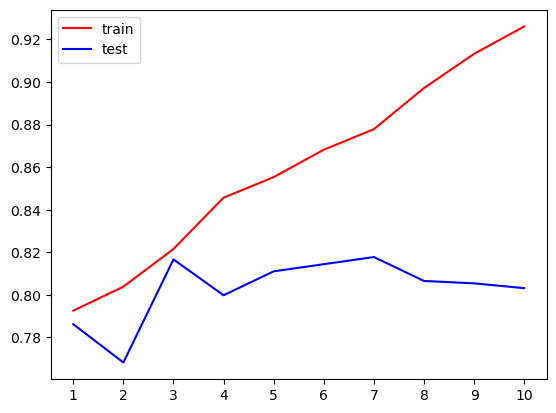

In [15]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=80,max_depth=i+1,criterion="entropy",splitter="best")
    clf = clf.fit(xtrain, ytrain)
    score_tr = clf.score(xtrain,ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()